<a href="https://colab.research.google.com/github/Wapiti08/Evasion_Attacks/blob/main/FGSM_Man.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install eagerpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip3 show tensorflow

Name: tensorflow
Version: 2.8.2+zzzcolab20220527125636
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: opt-einsum, keras-preprocessing, termcolor, tensorflow-estimator, google-pasta, h5py, tensorboard, libclang, protobuf, flatbuffers, keras, typing-extensions, astunparse, absl-py, gast, tensorflow-io-gcs-filesystem, grpcio, numpy, wrapt, setuptools, six
Required-by: kapre


In [3]:
import eagerpy as ep

In [4]:
import tensorflow as tf

x = tf.constant([1., 2., 3.])
x = ep.TensorFlowTensor(x)

In [5]:
x

TensorFlowTensor(<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>)

In [6]:
x.clip(0,2)

TensorFlowTensor(<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 2.], dtype=float32)>)

### build basic image classification system

In [7]:
import tensorflow as tf

In [8]:
from ssl import RAND_status
# load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [9]:
# x_train[0]

In [10]:
# build the model
from tensorflow.keras.layers import Dense, Conv2D, Dropout, MaxPool2D, Flatten
from tensorflow.keras.models import Sequential

In [11]:
# add channel
input_shape = [28, 28, 1]

x_train = x_train.reshape(x_train.shape[0] ,28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# normalize
x_train = x_train/255
x_test = x_test/255

In [12]:
model = Sequential()
# first con2d 
model.add(Conv2D(28, (3,3), input_shape = input_shape))
# maxpooling layer
model.add(MaxPool2D())
# Flatten layer
model.add(Flatten())
# First Dense
model.add(Dense(128, activation='relu'))
# Dropout layer
model.add(Dropout(0.2))
# Output layer, the unit number equals to total class number
model.add(Dense(10, activation='softmax'))

In [13]:
# compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


In [14]:
# fit the model with data
model.fit(x_train, y_train, batch_size =100, epochs=15, verbose=2)

Epoch 1/15
600/600 - 32s - loss: 0.2716 - accuracy: 0.9186 - 32s/epoch - 53ms/step
Epoch 2/15
600/600 - 21s - loss: 0.1096 - accuracy: 0.9672 - 21s/epoch - 35ms/step
Epoch 3/15
600/600 - 27s - loss: 0.0737 - accuracy: 0.9777 - 27s/epoch - 46ms/step
Epoch 4/15
600/600 - 21s - loss: 0.0569 - accuracy: 0.9817 - 21s/epoch - 35ms/step
Epoch 5/15
600/600 - 21s - loss: 0.0448 - accuracy: 0.9859 - 21s/epoch - 35ms/step
Epoch 6/15
600/600 - 21s - loss: 0.0365 - accuracy: 0.9887 - 21s/epoch - 35ms/step
Epoch 7/15
600/600 - 22s - loss: 0.0313 - accuracy: 0.9905 - 22s/epoch - 36ms/step
Epoch 8/15
600/600 - 21s - loss: 0.0265 - accuracy: 0.9910 - 21s/epoch - 35ms/step
Epoch 9/15
600/600 - 21s - loss: 0.0234 - accuracy: 0.9919 - 21s/epoch - 35ms/step
Epoch 10/15
600/600 - 21s - loss: 0.0214 - accuracy: 0.9928 - 21s/epoch - 35ms/step
Epoch 11/15
600/600 - 21s - loss: 0.0172 - accuracy: 0.9944 - 21s/epoch - 35ms/step
Epoch 12/15
600/600 - 21s - loss: 0.0170 - accuracy: 0.9945 - 21s/epoch - 35ms/step
E

In [15]:
model.evaluate(x_test, y_test)


313/313 [==============================] - 2s 7ms/step - loss: 0.0529 - accuracy: 0.9864


[0.052903447300195694, 0.9864000082015991]

The max possibility is:  [1.]
The predicted class is:  6


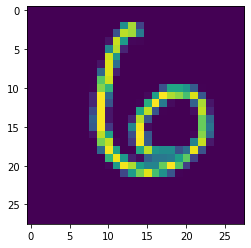

In [16]:
# predict on test data with right example

image_index = 100
import matplotlib.pyplot as plt

plt.imshow(x_test[image_index].reshape(28,28))

result = model.predict(x_test[image_index].reshape(1, 28,28,1))

print('The max possibility is: ', result.max(1))
print('The predicted class is: ', result.argmax())

The max possibility is:  [0.9999869]
The predicted class is:  9


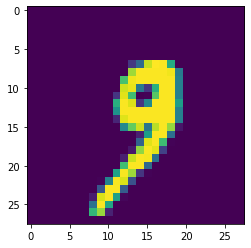

In [17]:
plt.imshow(x_test[1000].reshape(28,28))

result = model.predict(x_test[1000].reshape(1, 28,28,1))

print('The max possibility is: ', result.max(1))
print('The predicted class is: ', result.argmax())

In [18]:
# find the wrong prediction
prediction = model.predict(x_test)
# save the wrong predicted values
wrong_predict = []
for order, value in enumerate(y_test):
  if y_test[order] != prediction[order].argmax():
    wrong_predict.append(order)
print(wrong_predict)

[8, 62, 247, 321, 340, 359, 445, 495, 578, 582, 619, 684, 720, 813, 839, 883, 947, 951, 956, 1014, 1039, 1112, 1181, 1226, 1232, 1247, 1272, 1378, 1393, 1414, 1530, 1549, 1621, 1681, 1709, 1754, 1790, 1901, 2018, 2035, 2040, 2043, 2070, 2109, 2118, 2135, 2182, 2266, 2293, 2414, 2462, 2488, 2597, 2654, 2896, 2921, 2927, 2939, 2953, 3030, 3060, 3073, 3225, 3289, 3422, 3475, 3503, 3520, 3558, 3597, 3601, 3604, 3662, 3726, 3727, 3751, 3762, 3778, 3818, 3853, 3906, 3941, 3985, 4163, 4176, 4201, 4248, 4289, 4360, 4369, 4425, 4433, 4443, 4497, 4536, 4761, 4807, 4823, 4833, 4880, 5246, 5331, 5676, 5734, 5749, 5887, 5888, 5937, 5955, 5973, 6023, 6045, 6555, 6597, 6625, 6755, 7198, 7216, 7514, 7800, 7821, 7849, 9009, 9015, 9019, 9024, 9540, 9587, 9634, 9642, 9664, 9679, 9692, 9729, 9770, 9839]


The max possibility is:  [0.96978915]
The predicted class is:  9


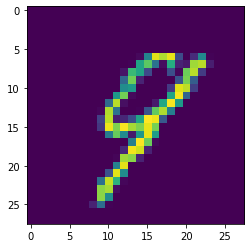

In [19]:
# wrong predicted example
image_index = 92

plt.imshow(x_test[image_index].reshape(28,28))

result = model.predict(x_test[image_index].reshape(1, 28,28,1))

print('The max possibility is: ', result.max(1))
print('The predicted class is: ', result.argmax())

Original result is: 6
Predicted result is: 8
Original result is: 9
Predicted result is: 3


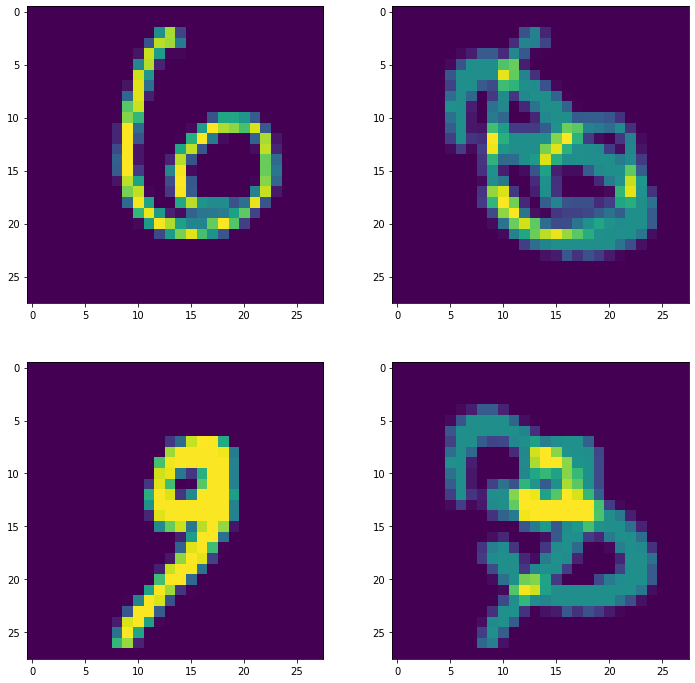

In [20]:
from itertools import permutations
# build adversarial example and see the predicted result
## the formula is '6'(1 confidence) + '9' (0.97 confidence) * 0.007 = ?

fig = plt.figure(figsize=(12,12))

perturbation_rate=1

ori_img_1 = x_test[100].reshape(28, 28)
fig.add_subplot(2, 2, 1)
plt.imshow(ori_img_1)
print("Original result is:", y_test[100])


adv_img_1 = x_test[100].reshape(1,28,28,1) + x_test[18].reshape(1,28,28,1) * perturbation_rate
fig.add_subplot(2, 2, 2)
plt.imshow(adv_img_1.reshape(28,28))
print("Predicted result is:", model.predict(adv_img_1).argmax())

ori_img_2 = x_test[1000].reshape(28, 28)
fig.add_subplot(2, 2, 3)
plt.imshow(ori_img_2)
print("Original result is:", y_test[1000])


adv_img_2 = x_test[1000].reshape(1,28,28,1) + x_test[18].reshape(1,28,28,1) * perturbation_rate
fig.add_subplot(2, 2, 4)
plt.imshow(adv_img_2.reshape(28,28))
print("Predicted result is:", model.predict(adv_img_2).argmax())



In [21]:
# retrain with wrong prediction
print("The length of wrong predicted values: ",len(wrong_predict))
model.train_on_batch(x_test[wrong_predict].reshape(len(wrong_predict),28,28,1), y_test[wrong_predict])
# return with (loss, accuracy)

The length of wrong predicted values:  136


[3.9563121795654297, 0.16911764442920685]

In [22]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0376 - accuracy: 0.9884


[0.037628162652254105, 0.9883999824523926]

Implementation of Fast Gradient Sign Method (FGSM)

In [93]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()

def create_adv_pattern(input_image, input_label):
  # record operations for automatic differentiation
  with tf.GradientTape() as tape:
    input_image = tf.reshape(input_image, (1,28,28,1))
    tape.watch(input_image)
    prediction = model(input_image)
    loss = loss_object(input_label, prediction)
  
  # get the gradient of the loss to the input image
  ## target, source
  gradient = tape.gradient(loss, input_image)
  ## get the sign of gradient for perturbation
  signed_grad = tf.sign(gradient)

  return signed_grad

In [138]:
image_index = 2
image_arr = x_test[1]
label = y_test[1]
perturbations = create_adv_pattern(image_arr, label)

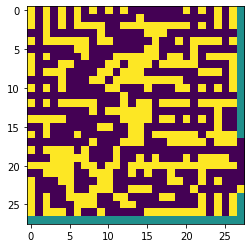

In [139]:
# change range [-1,1] to [0,1]
plt.imshow(tf.reshape(perturbations,(28,28)) * 0.5 + 0.5)

Try to add perturbations with different epsilon (size)

In [140]:
# decode_preds = tf.keras.applications.imagenet_utils.decode_predictions

def get_img_label(probs):
  '''
    return with label and confidence
  '''
  # return with top one guess --- return with class_name, class_desc, score
  return probs.argmax(), probs[0][probs.argmax()]


In [141]:
def display_image(image, description):
  # convert to the shape that can be predicted
  image = tf.reshape(image, (1,28,28,1))
  label, confidence = get_img_label(model.predict(image))
  plt.figure()

  plt.imshow(tf.reshape(image,(28,28))*0.5+0.5)
  plt.title('{} \n {} : {:.2f}% Confidence'.format(description, label, confidence))

  plt.show()


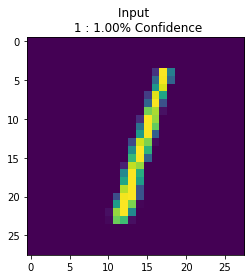

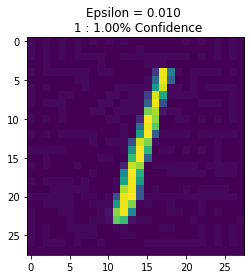

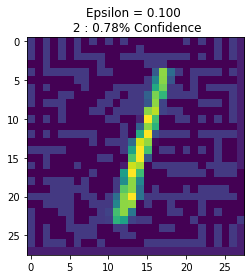

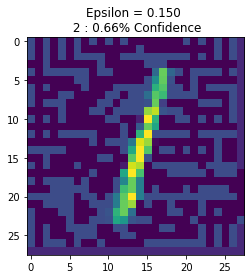

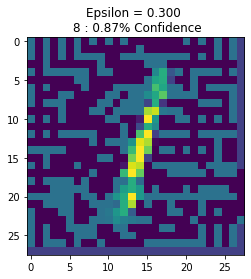

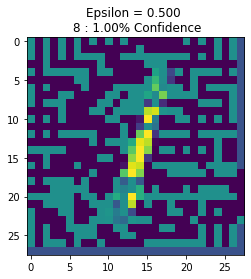

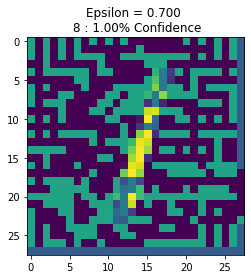

In [142]:
epsilons = [0, 0.01, 0.1, 0.15, 0.3, 0.5, 0.7]

descriptions = [('Epsilon = {:.3f}'.format(eps) if eps else 'Input' )
                for eps in epsilons] 

for i, eps in enumerate(epsilons):
    adv_img = tf.reshape(x_test[image_index], (1,28,28,1)) + eps*perturbations
    display_image(tf.reshape(adv_img,(28,28)), descriptions[i])
